## A Look at the Data

In order to get a better understanding of the data, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('C:/Users/Cristian/AppData/Local/Programs/Python/Data science learning/Udacity/survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Let's have a look at the number of rows and columns in this dataset.

In [3]:
print('Number of rows: ',str(df.shape[0]),'\nNumber of columns: ',str(df.shape[1]))

Number of rows:  19102 
Number of columns:  154


2. Are the columns with no missing values? I will store these in a set.

In [4]:
set(df.columns[df.isnull().mean()==0])

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

3. Are there columns with more than 75% of values missing? Will create another set for these.

In [5]:
set(df.columns[df.isnull().mean() > 0.75]) 

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

 4. Let's see what kind of educations people that responded to the survey have according to the **Professional** column and count the number of people in each category.

Let's create a nice plot to visualise, in percentages, how much each contituene is.

Professional developer                                  13774
Student                                                  2821
Professional non-developer who sometimes writes code     1782
None of these                                             368
Used to be a professional developer                       357
Name: Professional, dtype: int64


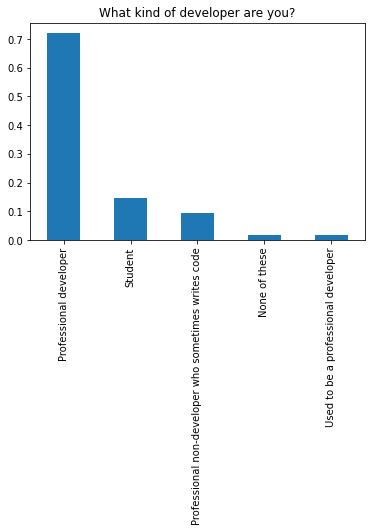

In [10]:
status_vals = df.Professional.value_counts()

print(status_vals)

#Plotting
(status_vals/df.shape[0]).plot(kind="bar");
plt.title("What kind of developer are you?");

5. Let's now see what kind of educations people that responded to the survey have according to the **FormalEducation** column and count the number of people in each category.

Again, we will plot this out in percentage of the whole form.

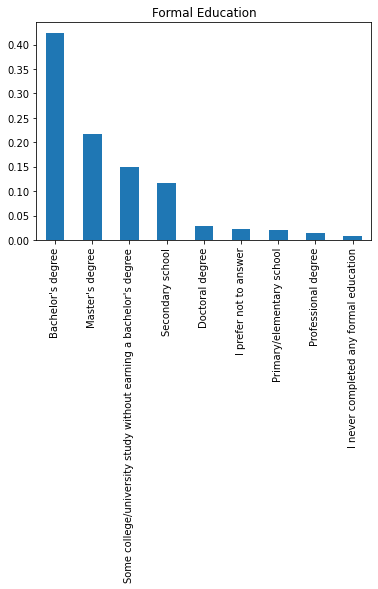

In [11]:
ed_vals = df.FormalEducation.value_counts()

# Plotting

(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

6. Lastly let's see in how many countries the people were divided in, according to the **Country** column and count how many people were in each.

Again, we'll plot the percentages.

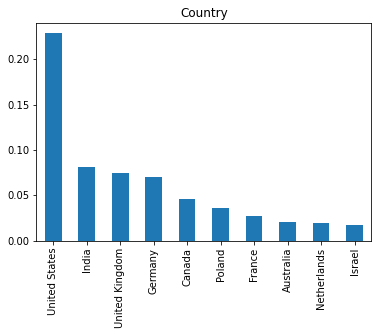

In [12]:
count_vals = df.Country.value_counts()

#Plotting

(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Country");

7. As a bonus let's see what the salary looks like in terms of education type, with some gender separation thrown in there. Better prediction of salary is done in one of the other notebooks.

In [13]:
pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female')").groupby(['Gender', 'FormalEducation']).mean()['Salary'])

Salary
Gender FormalEducation                                                 
Female Bachelor's degree                                   59901.894205
       Doctoral degree                                     83332.583351
       I prefer not to answer                              20691.397849
       Master's degree                                     51395.305901
       Professional degree                                 67521.095365
       Secondary school                                    38673.862023
       Some college/university study without earning a...  45149.521658
Male   Bachelor's degree                                   59538.372951
       Doctoral degree                                     77120.265378
       I never completed any formal education              43956.636637
       I prefer not to answer                              40850.596080
       Master's degree                                     61632.442196
       Primary/elementary school                           64022.483103
       Professional degree                                 45662.824726
       Secondary school                                    39544.122310
       Some college/university study without earning a...  60420.217368

It does seem like the Doctoral Degree yields the best mean but bachelor and masters seem to be about the same.